## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

## Data Loading

In [3]:
data_dir = Path("../input/atma5/")

train = pd.read_csv(data_dir / "train.csv")
test = pd.read_csv(data_dir / "test.csv")
fitting = pd.read_csv(data_dir / "fitting.csv")
spec_train = pd.read_csv(data_dir / "train_spectrum.csv")
spec_test = pd.read_csv(data_dir / "test_spectrum.csv")

## Check Histogram

In [47]:
def make_train_test_hist(train: pd.DataFrame, test: pd.DataFrame, 
                         name: str, bins=None, ylim=None):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    train_target_0 = train[name][train["target"] == 0]
    train_target_1 = train[name][train["target"] == 1]
    
    weights_0 = np.ones(len(train_target_0)) / float(len(train_target_0))
    weights_1 = np.ones(len(train_target_1)) / float(len(train_target_1))
    
    axes[0].hist(train[name], alpha=0.5, label="train", bins=bins)
    axes[0].hist(test[name], alpha=0.5, label="test", bins = bins)
    axes[0].set_title(f"{name}_test")
    axes[0].set_ylim(ylim)
    axes[0].legend()
    
    axes[1].hist(train_target_0, weights=weights_0, alpha=0.5, label="target_0", bins=bins)
    axes[1].hist(train_target_1, weights=weights_1, alpha=0.5, label="target_1", bins=bins)
    axes[1].set_title(f"{name}_train_target_0_1")
    axes[1].legend()
    
    plt.show()

In [23]:
train_agg = spec_train.groupby(
    "spectrum_filename")["intensity"].agg(["min", "max", "std", "median", "mean", "skew"])
test_agg = spec_test.groupby(
    "spectrum_filename")["intensity"].agg(["min", "max", "std", "median", "mean", "skew"])

train_kurt_agg = spec_train.groupby(
    "spectrum_filename")["intensity"].agg(pd.DataFrame.kurt)
test_kurt_agg = spec_test.groupby(
    "spectrum_filename")["intensity"].agg(pd.DataFrame.kurt)

### Plot max

In [24]:
merged_train = train.merge(train_agg, on="spectrum_filename", how="left")
merged_test = test.merge(test_agg, on="spectrum_filename", how="left")

merged_train = merged_train.merge(train_kurt_agg, on="spectrum_filename", how="left")
merged_test = merged_test.merge(test_kurt_agg, on="spectrum_filename", how="left")

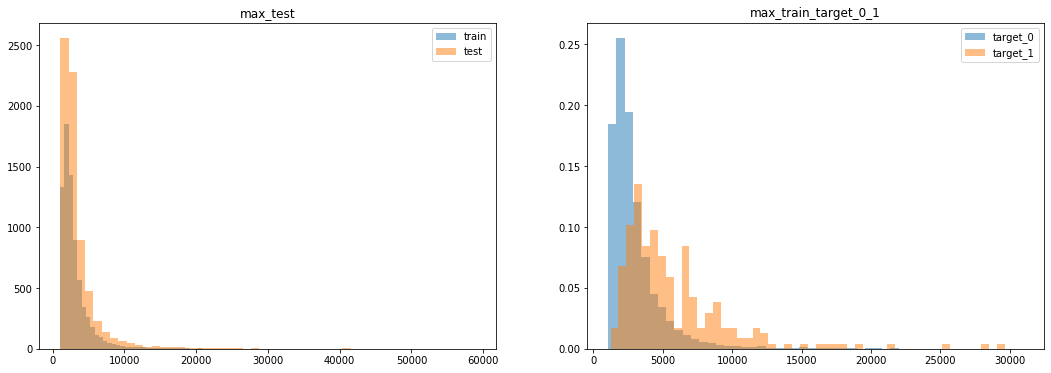

In [13]:
make_train_test_hist(merged_train, merged_test, name="max", bins=50)

In [14]:
T = 10000

max_threshed_train = merged_train.copy()
max_threshed_test = merged_test.copy()
max_threshed_train.loc[max_threshed_train["max"] > T, "max"] = 10000
max_threshed_test.loc[max_threshed_test["max"] > T, "max"] = 10000

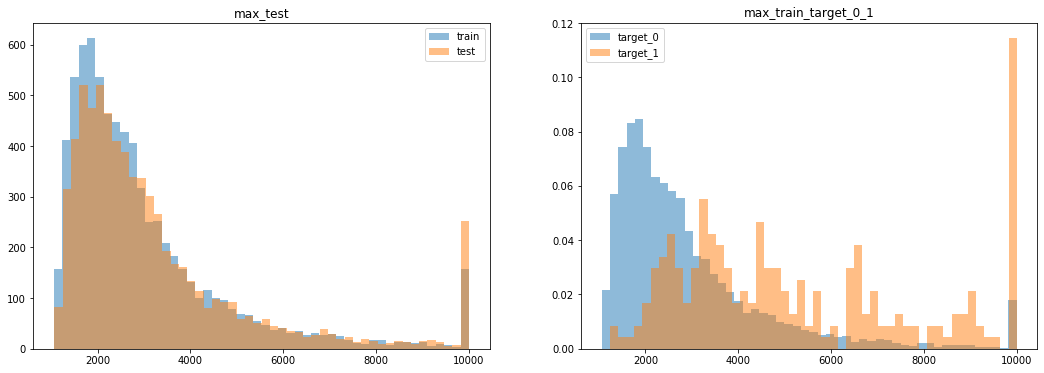

In [16]:
make_train_test_hist(max_threshed_train, max_threshed_test, name="max", bins=50)

### Plot std

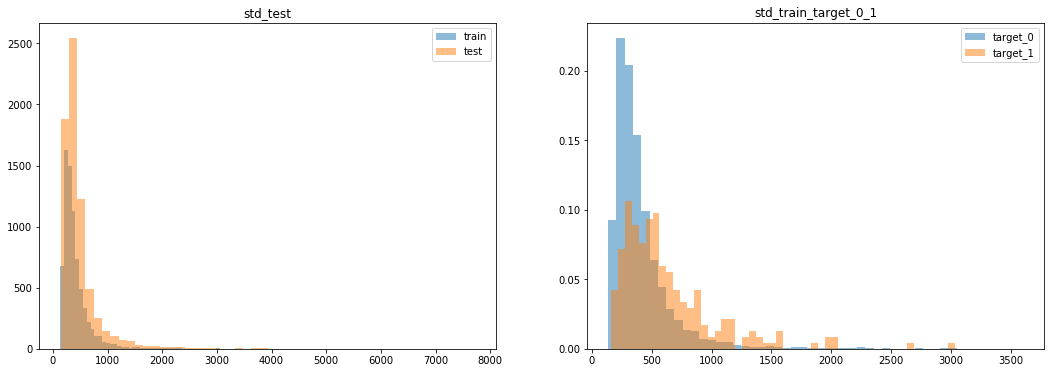

In [22]:
make_train_test_hist(merged_train, merged_test, name="std", bins=50)

### Plot Skew

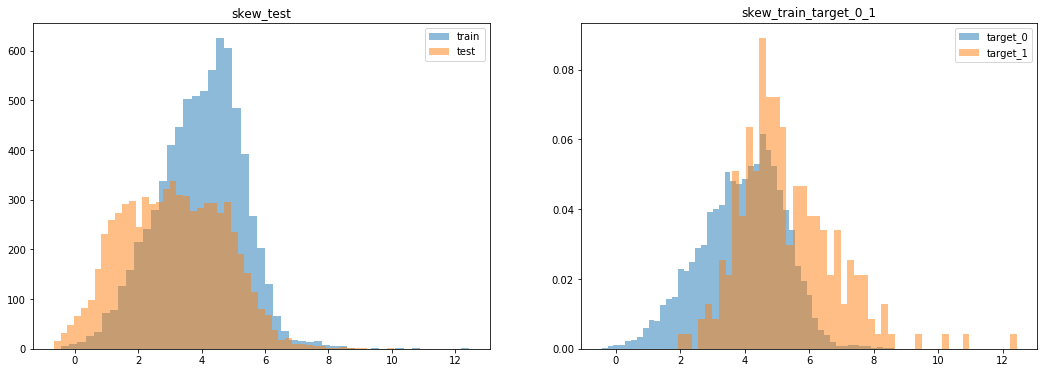

In [25]:
make_train_test_hist(merged_train, merged_test, name="skew", bins=50)

### Plot kurt

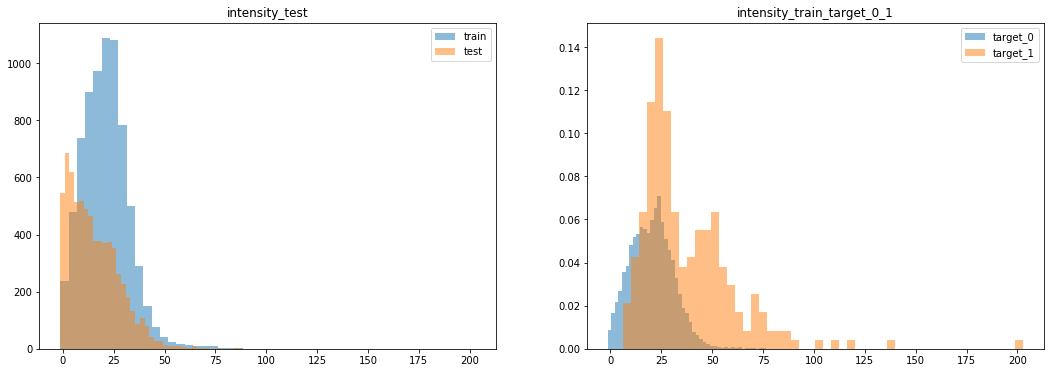

In [48]:
make_train_test_hist(merged_train, merged_test, name="intensity", bins=50)

In [29]:
fitting

,spectrum_id,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,6107accbaad355ef7a6a,127.865949,25377.691201,1308.970437,5.600802,77836.688738,1301.065016,14.687265,8.331534,0.245874
1,3be74624a599687d0b8f,9.023676,205.521195,1462.187071,0.668172,49587.620979,1378.112643,13.355577,8.358730,0.004128
2,617eb161c85ff95c5fdb,32.822043,18667.152957,1384.763808,4.490281,35194.815507,1376.280627,15.707628,7.605297,0.346574
3,e237d06fbf3d37e4d4bc,16.325396,23360.457021,1280.814542,5.303881,46549.391919,1289.514997,14.972257,8.748348,0.334151
4,4b452c285ad323eb61d1,106.657770,6515.839921,1342.920428,2.682163,55168.669735,1329.587607,21.026383,9.888422,0.105632
...,...,...,...,...,...,...,...,...,...,...
16450,e5584981b3a0ad9e3eb5,214.409962,7907.851099,1414.622706,5.722671,6756.384802,1409.742022,6.176104,17.018623,0.539261
16451,04bdc8cbc0418dc7636e,276.173294,1595.352156,1087.828556,2.312141,18169.510424,1085.818900,5.457549,13.672009,0.080717
16452,e73ead4a703c6b780489,346.199166,8694.938286,1085.082204,4.881881,8941.867352,1087.400495,5.248903,13.353382,0.493000
16453,86b7a07a0d2415a69cf2,369.416004,2515.158787,1406.174282,2.690112,10577.393228,1401.778519,6.097363,16.985297,0.192106


In [30]:
merged_train = merged_train.merge(fitting, on="spectrum_id", how="left")
merged_test = merged_test.merge(fitting, on="spectrum_id", how="left")


NameError: name 'merged' is not defined

In [31]:
merged_train.head()

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,target,min,...,intensity,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,000da4633378740f1ee8,b2e223339f4abce9b400.dat,79ad4647da6de6425abf,850,2,36,140,1313.0810,0,-228.0,...,37.686259,30.808589,5.811802e+02,1037.714752,1.531423,22469.651641,1032.317268,8.295610,10.028668,2.521298e-02
1,000ed1a5a9fe0ad2b7dd,e2f150a503244145e7ce.dat,79ad4647da6de6425abf,780,3,0,168,159.4150,0,-263.0,...,43.522244,91.300897,1.740582e+04,1080.510452,4.766233,33257.123175,1077.468855,8.018225,7.948485,3.435612e-01
2,0016e3322c4ce0700f9a,3d58b7ccaee157979cf0.dat,c695a1e61e002b34e556,780,1,34,29,-610.7688,0,-235.0,...,22.190307,106.642946,1.000000e-10,1119.464438,2.000000,42579.867913,1378.883338,11.687417,10.739859,2.348528e-15
3,00256bd0f8c6cf5f59c8,ed3641184d3b7c0ae703.dat,c695a1e61e002b34e556,780,2,32,139,1214.6180,0,-52.0,...,15.635128,306.933674,1.099486e+04,1139.855067,5.198692,39349.741703,1145.212849,9.445029,10.379948,2.183921e-01
4,003483ee5ae313d37590,4c63418d39f86dfab9bb.dat,c695a1e61e002b34e556,780,0,45,85,-257.6161,0,-245.0,...,39.884854,46.133256,2.227622e+04,1120.918337,5.668012,31054.928673,1117.107782,7.658710,8.316550,4.176962e-01


### Plot param0

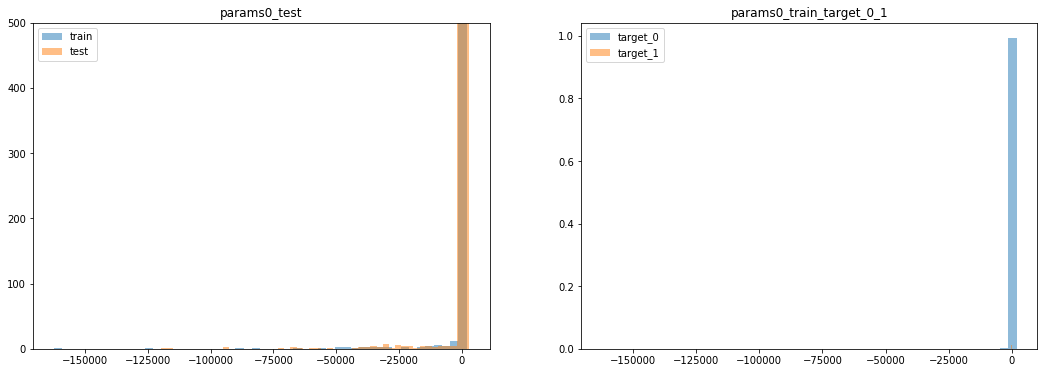

In [51]:
make_train_test_hist(merged_train, merged_test, name="params0", bins=50, ylim=(0, 500))

In [36]:
merged_train.query("target == 0").params0.mean(), merged_train.query("target == 1").params0.mean()

(-56.41088125044479, 71.68438794500295)

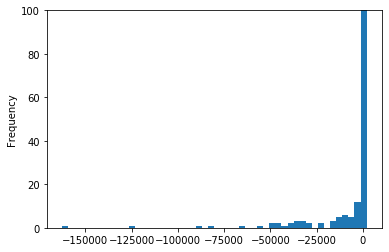

In [46]:
merged_train.query("target == 0").params0.plot.hist(bins=50, ylim=(0, 100));

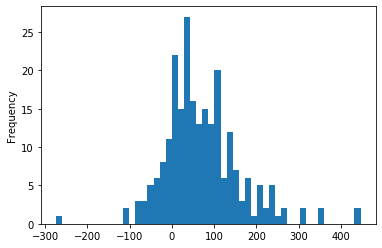

In [44]:
merged_train.query("target == 1").params0.plot.hist(bins=50);

In [53]:
merged_train["max_min"] = merged_train["max"] - merged_train["min"]
merged_test["max_min"] = merged_test["max"] - merged_test["min"]
merged_train["max_mean"] = merged_train["max"] - merged_train["mean"]
merged_test["max_mean"] = merged_test["max"] - merged_test["mean"]
merged_train["max_median"] = merged_train["max"] - merged_train["median"]
merged_test["max_median"] = merged_test["max"] - merged_test["median"]

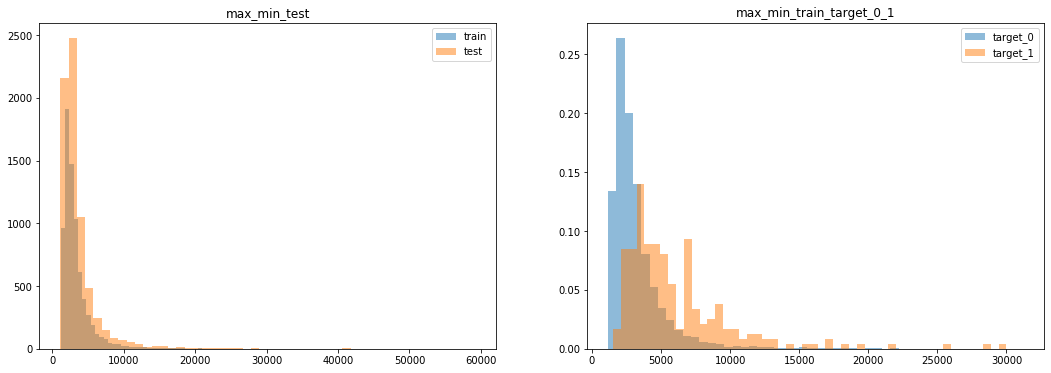

In [54]:
make_train_test_hist(merged_train, merged_test, name="max_min", bins=50)

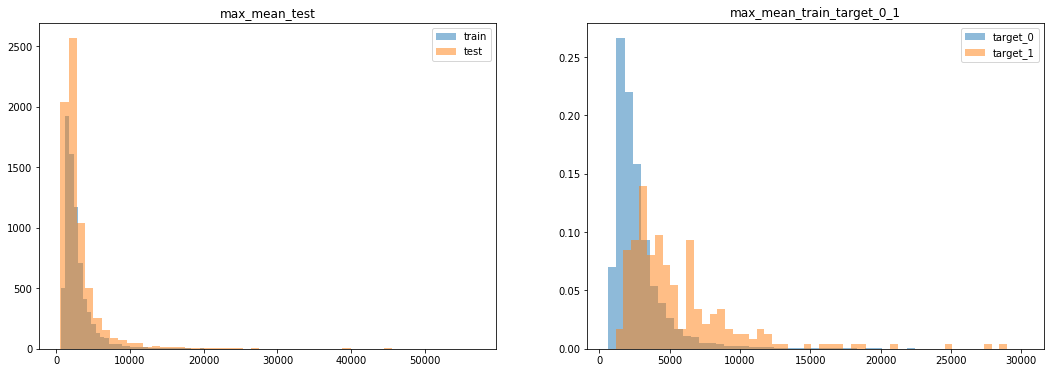

In [55]:
make_train_test_hist(merged_train, merged_test, name="max_mean", bins=50)

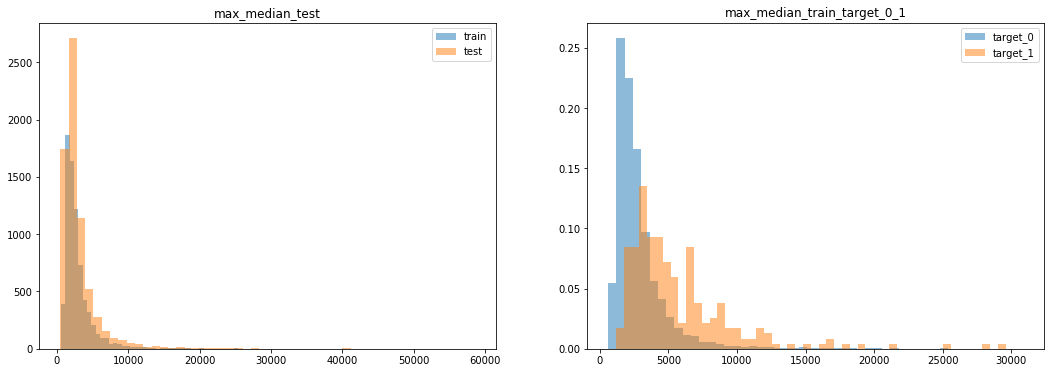

In [56]:
make_train_test_hist(merged_train, merged_test, name="max_median", bins=50)

In [57]:
merged_train["max_over_mean"] = merged_train["max"] / merged_train["mean"]
merged_test["max_over_mean"] = merged_test["max"] / merged_test["mean"]
merged_train["max_over_median"] = merged_train["max"] / merged_train["median"]
merged_test["max_over_median"] = merged_test["max"] / merged_test["median"]

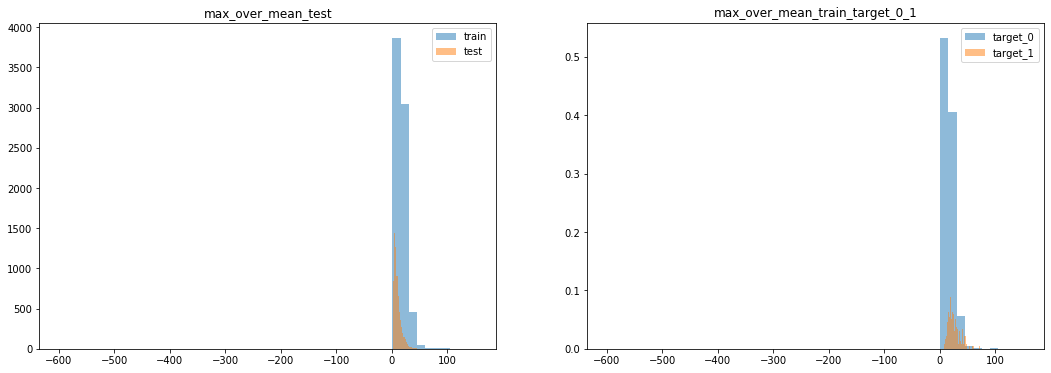

In [58]:
make_train_test_hist(merged_train, merged_test, name="max_over_mean", bins=50)

ValueError: supplied range of [-6036.0, inf] is not finite

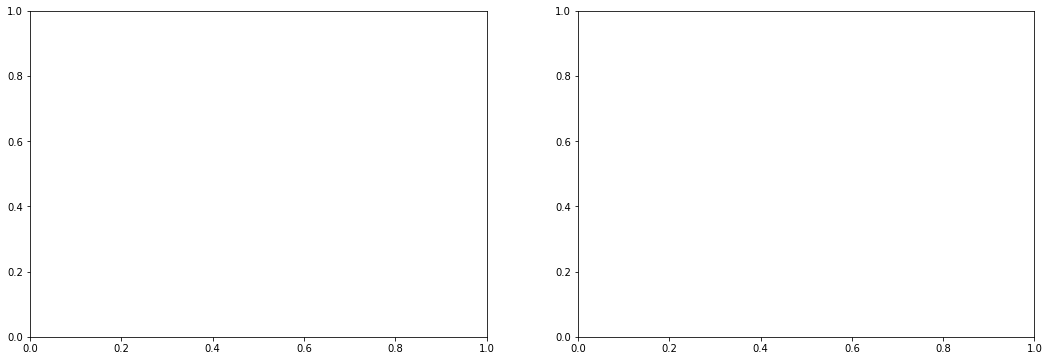

In [59]:
make_train_test_hist(merged_train, merged_test, name="max_over_median", bins=50)

In [61]:
merged_train["abs_skew"] = merged_train["skew"].abs()
merged_test["abs_skew"] = merged_test["skew"].abs()

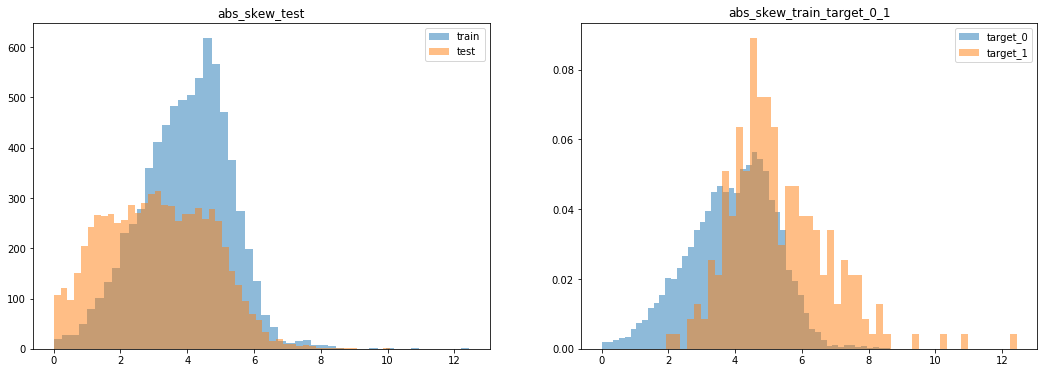

In [62]:
make_train_test_hist(merged_train, merged_test, name="abs_skew", bins=50)